## 1)Problem Statement

A **credit score** is a numerical representation of an individual's creditworthiness, typically ranging from 300 to 850. It helps lenders assess the risk of lending money to individuals. Higher credit scores indicate better creditworthiness, meaning the individual is more likely to repay loans on time, while lower scores indicate higher risk.

### Key Factors That Determine a Credit Score:
1. **Payment History (35%)**:
   - This is the most significant factor. It includes whether you’ve paid past credit accounts on time. Late payments, defaults, bankruptcies, and foreclosures negatively impact your score.

2. **Credit Utilization (30%)**:
   - This is the ratio of current credit card balances to the total credit limit. It’s recommended to keep credit utilization below 30%. For example, if your total credit limit is $10,000 and your balance is $3,000, your utilization rate is 30%.

3. **Length of Credit History (15%)**:
   - The longer your credit history, the better. This includes the age of your oldest account, the average age of all accounts, and how long it’s been since you used certain accounts.

4. **Credit Mix (10%)**:
   - Having a variety of credit types (e.g., credit cards, mortgages, auto loans) can help your score. It shows you can manage different types of debt.

5. **New Credit (10%)**:
   - Opening several new credit accounts in a short period can negatively impact your score. Each time you apply for credit, a hard inquiry is made, which can lower your score temporarily.

Credit risk model building is the process of developing statistical or machine learning models to assess the likelihood that a borrower or customer will default on their financial obligations. These models are essential in banking, lending, and financial services as they help institutions quantify the level of risk associated with granting loans or credit to customers. A critical model within this domain is the Probability of Default (PD) model, which estimates the likelihood that a borrower will default on a loan within a specific timeframe, often one year.

Dataset Location - https://github.com/venkatareddykonasani/Datasets/tree/master/Give%20me%20some%20Credit

## 2)Data Exploration, Validation, Cleaning

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Import Give me some Credit\cs-training.csv

In [3]:
# Two years of data on loan applications, including whether the borrower defaulted or not.
loans=pd.read_csv ("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Give%20me%20some%20Credit/cs-training.csv")

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Sr_No                                 150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   monthly_utilization                   150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [5]:
loans.head(10)

,Sr_No,SeriousDlqin2yrs,monthly_utilization,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [6]:
# To check for null/missing values in the dataset
loans.isnull().sum()

Sr_No                                       0
SeriousDlqin2yrs                            0
monthly_utilization                         0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

### Categorical and Discrete Variables Exploration

In [7]:
loans['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64

In [8]:
loans["age"].value_counts()

age
49     3837
48     3806
50     3753
47     3719
63     3719
       ... 
102       3
109       2
107       1
105       1
0         1
Name: count, Length: 86, dtype: int64

In [9]:
loans['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

# 96, 98 values are outliers (because in 24 months how can someone pay 96 or 98 times one month late)

NumberOfTime30-59DaysPastDueNotWorse
0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: count, dtype: int64

In [10]:
loans["NumberOfOpenCreditLinesAndLoans"].value_counts()

# Outliers present because having around 20 open credit line and loans is somehow common but 57, 48 or 0 looks suspicious

NumberOfOpenCreditLinesAndLoans
6     13614
7     13245
5     12931
8     12562
4     11609
9     11355
10     9624
3      9058
11     8321
12     7005
2      6666
13     5667
14     4546
1      4438
15     3645
16     3000
17     2370
0      1888
18     1874
19     1433
20     1169
21      864
22      685
23      533
24      422
25      337
26      239
27      194
28      150
29      114
30       88
31       74
32       52
33       47
34       35
35       27
36       18
38       13
40       10
39        9
42        8
45        8
43        8
37        7
48        6
49        4
54        4
41        4
52        3
46        3
57        2
51        2
56        2
47        2
50        2
44        2
58        1
53        1
Name: count, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x22b84e1cf50>,
 'caps': [<matplotlib.lines.Line2D at 0x22b84e1d550>,
 'boxes': [<matplotlib.lines.Line2D at 0x22b84e1cb60>],
 'medians': [<matplotlib.lines.Line2D at 0x22b84e1db50>],
 'fliers': [<matplotlib.lines.Line2D at 0x22b84e1ddf0>],
 'means': []}

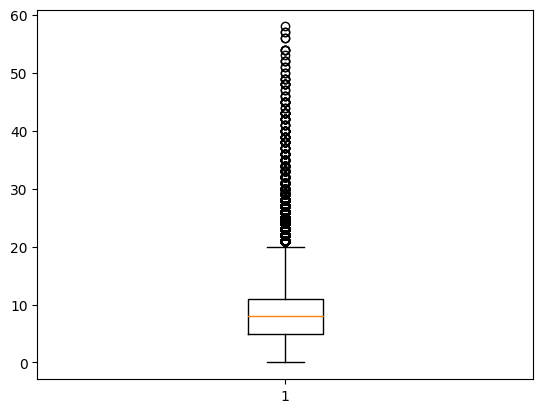

In [11]:
plt.boxplot(loans["NumberOfOpenCreditLinesAndLoans"])

# We can see that there are too many outliers in this column

In [12]:
loans["NumberOfTimes90DaysLate"].value_counts()

# 96 & 98 are outliers values (24 months data -> 24 bills so these values aren't possible)

NumberOfTimes90DaysLate
0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: count, dtype: int64

In [13]:
loans["NumberRealEstateLoansOrLines"].value_counts()

# having too much home loans looks suspicious -> outliers present

NumberRealEstateLoansOrLines
0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
15        7
14        7
17        4
16        4
25        3
18        2
23        2
19        2
20        2
26        1
54        1
21        1
29        1
32        1
Name: count, dtype: int64

In [14]:
loans["NumberOfTime60-89DaysPastDueNotWorse"].value_counts()

# 96 & 98 are outliers values (24 months data -> 24 bills so these values aren't possible)

NumberOfTime60-89DaysPastDueNotWorse
0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: count, dtype: int64

In [15]:
loans["NumberOfDependents"].value_counts()

NumberOfDependents
0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: count, dtype: int64

In [16]:
loans["NumberOfDependents"].isnull().sum()

# Null values are present in this column

3924

### Continuous Variable Exploration

#### Column = "monthly_utilization"

{'whiskers': [<matplotlib.lines.Line2D at 0x22b856bf3b0>,
 'caps': [<matplotlib.lines.Line2D at 0x22b856bf9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22b856bf0b0>],
 'medians': [<matplotlib.lines.Line2D at 0x22b856bff50>],
 'fliers': [<matplotlib.lines.Line2D at 0x22b856f4230>],
 'means': []}

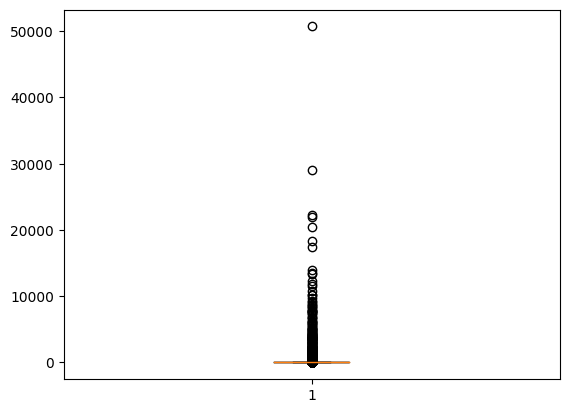

In [17]:
# To check for outliers in the dataset
plt.boxplot(loans["monthly_utilization"])  

In [18]:
# Monthly utilization percentage should be between 0-100% or 0-1 but we can see that there are outliers in this column

loans["monthly_utilization"].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

0.1        0.002969
0.2        0.019222
0.3        0.043461
0.4        0.083181
0.5        0.154181
0.6        0.271493
0.7        0.445136
0.8        0.698857
0.9        0.981278
1.0    50708.000000
Name: monthly_utilization, dtype: float64

In [19]:
util_percentiles = loans["monthly_utilization"].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
round(util_percentiles, 2)

# 97% of customers have utilization ≤ 1.0
# After that extreme outliers exist
# 97% data is clean while 3% data needs cleaning

0.10        0.00
0.20        0.02
0.30        0.04
0.40        0.08
0.50        0.15
0.60        0.27
0.70        0.45
0.80        0.70
0.90        0.98
0.95        1.00
0.96        1.00
0.97        1.00
0.98        1.01
0.99        1.09
1.00    50708.00
Name: monthly_utilization, dtype: float64

#### Column = "MonthlyIncome"

{'whiskers': [<matplotlib.lines.Line2D at 0x22b85732660>,
 'caps': [<matplotlib.lines.Line2D at 0x22b85732c60>,
 'boxes': [<matplotlib.lines.Line2D at 0x22b857323c0>],
 'medians': [<matplotlib.lines.Line2D at 0x22b85733230>],
 'fliers': [<matplotlib.lines.Line2D at 0x22b85733500>],
 'means': []}

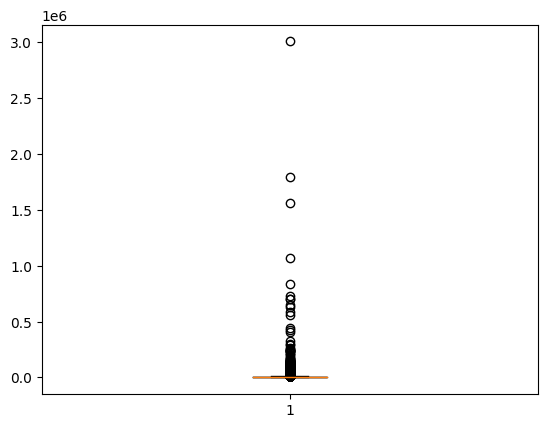

In [20]:
plt.boxplot(loans["MonthlyIncome"].dropna())


In [21]:
# count the missing value percentage in MonthlyIncome column
missing_income = loans["MonthlyIncome"].isnull().sum()
print(f"Count of missing values in MonthlyIncome: {missing_income}")
missing_percentage = missing_income / len(loans) * 100
print(f"Percentage of missing values in MonthlyIncome: {missing_percentage:.2f}%")

Count of missing values in MonthlyIncome: 29731
Percentage of missing values in MonthlyIncome: 19.82%


#### Column = "DebtRatio"

{'whiskers': [<matplotlib.lines.Line2D at 0x22b8579df10>,
 'caps': [<matplotlib.lines.Line2D at 0x22b8579e480>,
 'boxes': [<matplotlib.lines.Line2D at 0x22b8579dc70>],
 'medians': [<matplotlib.lines.Line2D at 0x22b8579e9f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22b8579ec90>],
 'means': []}

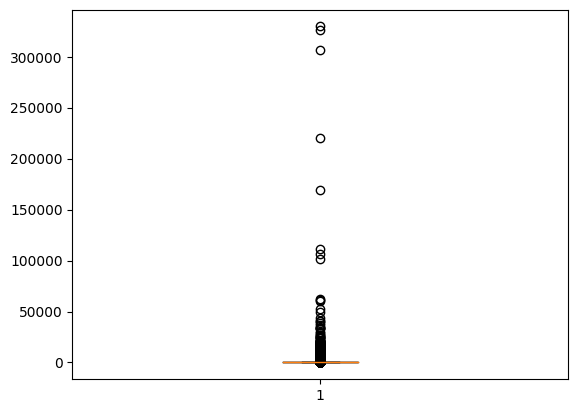

In [22]:
plt.boxplot(loans["DebtRatio"])

Data Exploration Interpretation:

##### Categorical/Discrete Variables:
1. NumberOfTime30-59DaysPastDueNotWorse: 96, 98 value error (because in 24 months how can someone pay 96 or 98 times one month late)
2. NumberOfOpenCreditLinesAndLoans: Outliers present because having around 20 open credit line and loans is somehow common but 57, 48 or 0 looks suspicious
3. NumberOfTimes90DaysLate: 96 & 98 are outliers values (24 months data -> 24 bills so this isn't possible)
4. NumberRealEstateLoansOrLines: Outliers present since someone having too much home loans looks fishy 
5. NumberOfTime60-89DaysPastDueNotWorse: 96, 98 value error
6. NumberOfDependents: Missing values
##### Continuous Variables:
1. monthly_utilization: outliers in 3% of the data
2. DebtRatio: outliers present
3. MonthlyIncome: Missing values + Outliers

### Data Cleaning

##### monthly_utilization

In [23]:
# since outliers are in 3% of the data, replacing them with the median value

median_util = loans["monthly_utilization"].median()
median_util

0.154180737

In [24]:
# wherever utilization is greater than 1, replace it with the median value
loans['util_new']=loans['monthly_utilization']

# loans['util_new'][loans['util_new'] > 1] = median_util   # Pandas is not sure whether changes will go back to loans -> chained assignment
loans.loc[loans['util_new'] > 1, 'util_new'] = median_util  # this is the correct way to replace values in a column based on a condition

In [25]:
# percentile distribution for new variable
util_percentiles1=loans['util_new'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles1,2)

0.050    0.00
0.100    0.00
0.250    0.03
0.500    0.15
0.750    0.51
0.800    0.63
0.900    0.93
0.910    0.95
0.950    1.00
0.960    1.00
0.970    1.00
0.975    1.00
0.980    1.00
0.990    1.00
1.000    1.00
Name: util_new, dtype: float64

In [26]:
loans["util_new"].describe()

count    150000.000000
mean          0.300469
std           0.334855
min           0.000000
25%           0.029867
50%           0.154178
75%           0.506929
max           1.000000
Name: util_new, dtype: float64

##### NumberOfTime30-59DaysPastDueNotWorse - One Month Late Frequency

In [27]:
loans['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: count, dtype: int64

In [28]:
# Look at the cross tab of variable vs target
import pandas as pd
cross_tab_30dpd_target=pd.crosstab(loans['NumberOfTime30-59DaysPastDueNotWorse'],loans['SeriousDlqin2yrs'])
cross_tab_30dpd_target


SeriousDlqin2yrs,0,1
NumberOfTime30-59DaysPastDueNotWorse,,
0,120977,5041
1,13624,2409
2,3379,1219
3,1136,618
4,429,318
5,188,154
6,66,74
7,26,28
8,17,8


In [29]:
#Cross tab row Percentages
cross_tab_30dpd_target_percent=cross_tab_30dpd_target.apply(lambda x: x/x.sum(), axis=1)
round(cross_tab_30dpd_target_percent,2)

SeriousDlqin2yrs,0,1
NumberOfTime30-59DaysPastDueNotWorse,,
0,0.96,0.04
1,0.85,0.15
2,0.73,0.27
3,0.65,0.35
4,0.57,0.43
5,0.55,0.45
6,0.47,0.53
7,0.48,0.52
8,0.68,0.32


In [30]:
# Percentage of 0 and 1 of 98 is near to percentages of 6
# and percentage of 0 & 1 of 96 is closer to percentages of 10
# Replacing error values with 6 and 10

loans['num_30_59_dpd_new']=loans['NumberOfTime30-59DaysPastDueNotWorse']
loans.loc[loans['num_30_59_dpd_new'] == 98, 'num_30_59_dpd_new']=6
loans.loc[loans['num_30_59_dpd_new'] == 96, 'num_30_59_dpd_new']=10

loans['num_30_59_dpd_new'].value_counts()

num_30_59_dpd_new
0     126018
1      16033
2       4598
3       1754
4        747
6        404
5        342
7         54
8         25
9         12
10         9
12         2
13         1
11         1
Name: count, dtype: int64

##### MonthlyIncome

In [31]:
# To find the missing value % in monthly income

loans['MonthlyIncome'].isnull().sum()
round(loans['MonthlyIncome'].isnull().sum()/len(loans) * 100, 2)

# Once identified where missing values exist, the next task usually is to fill them (data imputation). Depending upon the context,
# in this case, since here only 20% data is missing, I'm assigning median value to all those positions where missing value is present

19.82

In [32]:
#Flag variable: to preserve the predictive signal associated with missingness

loans['MonthlyIncome_ind'] = loans['MonthlyIncome'].notnull().astype(int)
loans['MonthlyIncome_ind'].value_counts()

MonthlyIncome_ind
1    120269
0     29731
Name: count, dtype: int64

In [33]:
loans['MonthlyIncome_new']=loans['MonthlyIncome']

loans.loc[loans['MonthlyIncome'].isnull(), 'MonthlyIncome_new'] = loans['MonthlyIncome'].median()
round(loans['MonthlyIncome_new'].describe())

loans['MonthlyIncome_new'].isnull().sum()   # 0 -> no value is missing now

0

##### Age

In [34]:
loans["age"].quantile([0, 0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.90,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

# Max Age - 80 (suppose it's decided as per bussiness context)
# 1% Outliers are on the Low Side   (Min. value(0.00) of age = 0 &  0.01 -> 24.0 (Less than 1% people have age less than 24))
# 3% Outliers are on The High Side  (from 0.97, age > 80 -> 3% data is outlier)

0.00      0.0
0.01     24.0
0.10     33.0
0.20     39.0
0.30     44.0
0.40     48.0
0.50     52.0
0.60     56.0
0.70     61.0
0.80     65.0
0.90     72.0
0.93     75.0
0.94     76.0
0.95     78.0
0.96     79.0
0.97     81.0
0.98     84.0
0.99     87.0
1.00    109.0
Name: age, dtype: float64

In [35]:
loans["age_new"]=loans["age"]

loans.loc[(loans["age"]>80) | (loans["age"] < 24), "age_new"]=loans["age"].median()

loans["age_new"].quantile([0, 0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.90,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.00    24.0
0.01    25.0
0.10    33.0
0.20    39.0
0.30    44.0
0.40    48.0
0.50    52.0
0.60    55.0
0.70    59.0
0.80    63.0
0.90    69.0
0.93    72.0
0.94    73.0
0.95    74.0
0.96    75.0
0.97    76.0
0.98    77.0
0.99    79.0
1.00    80.0
Name: age_new, dtype: float64

##### DebtRatio

In [36]:
# DebtRatio is possible in the range of 0% to 100%,i.e., [0,1]
loans["DebtRatio"].quantile([0,0.01,0.02,0.03,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.74,0.75,0.76,0.77,0.78,0.8,0.85,0.90,0.95,0.99,1])

# 75% data is clean, 25% data have outliers

0.00         0.000000
0.01         0.000000
0.02         0.000000
0.03         0.000480
0.05         0.004329
0.10         0.030874
0.20         0.133773
0.30         0.213697
0.40         0.287460
0.50         0.366508
0.60         0.467506
0.70         0.649189
0.74         0.802954
0.75         0.868254
0.76         0.951184
0.77         1.058832
0.78         1.275069
0.80         4.000000
0.85       269.150000
0.90      1267.000000
0.95      2449.000000
0.99      4979.040000
1.00    329664.000000
Name: DebtRatio, dtype: float64

In [37]:
loans["DebtRatio"].isnull().sum()

# No missing values, all 25% data are outliers

0

In [38]:
loans["DebtRatio_new"] = loans["DebtRatio"]

loans.loc[loans["DebtRatio"] > 1, "DebtRatio_new"] = loans["DebtRatio_new"].median()
loans["DebtRatio_new"].quantile([0,0.01,0.02,0.03,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.74,0.75,0.76,0.77,0.78,0.8,0.85,0.90,0.95,0.99,1])

0.00    0.000000
0.01    0.000000
0.02    0.000000
0.03    0.000480
0.05    0.004329
0.10    0.030874
0.20    0.133773
0.30    0.213697
0.40    0.287460
0.50    0.366506
0.60    0.366508
0.70    0.366508
0.74    0.371301
0.75    0.380021
0.76    0.388693
0.77    0.398524
0.78    0.408426
0.80    0.428984
0.85    0.487429
0.90    0.568251
0.95    0.696102
0.99    0.913862
1.00    1.000000
Name: DebtRatio_new, dtype: float64

##### NumberOfOpenCreditLinesAndLoans

In [39]:
loans["NumberOfOpenCreditLinesAndLoans"].value_counts(sort=False)

NumberOfOpenCreditLinesAndLoans
13     5667
4     11609
2      6666
5     12931
7     13245
3      9058
8     12562
9     11355
6     13614
10     9624
14     4546
22      685
17     2370
1      4438
15     3645
31       74
12     7005
21      864
11     8321
19     1433
18     1874
26      239
20     1169
23      533
0      1888
16     3000
27      194
29      114
28      150
24      422
25      337
32       52
46        3
33       47
30       88
34       35
37        7
38       13
36       18
35       27
54        4
43        8
45        8
49        4
57        2
48        6
40       10
58        1
51        2
52        3
39        9
41        4
56        2
42        8
47        2
50        2
44        2
53        1
Name: count, dtype: int64

In [40]:
loans["NumberOfOpenCreditLinesAndLoans"].quantile([0, 0.1, 0.2,0.3,0.4, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])

# 3% High side outliers (depends on business problem, i am considering 20 as limit)
# No Missing values

0.000     0.0
0.100     3.0
0.200     4.0
0.300     5.0
0.400     6.0
0.500     8.0
0.750    11.0
0.800    12.0
0.900    15.0
0.910    16.0
0.950    18.0
0.960    19.0
0.970    20.0
0.975    21.0
0.980    22.0
0.990    24.0
1.000    58.0
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

In [41]:
loans["Open_Credit_lines_new"]=loans["NumberOfOpenCreditLinesAndLoans"]

loans.loc[loans["NumberOfOpenCreditLinesAndLoans"] > 20, "Open_Credit_lines_new"] = loans["NumberOfOpenCreditLinesAndLoans"].median()
loans["Open_Credit_lines_new"].quantile([0, 0.1, 0.2,0.3,0.4, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])

0.000     0.0
0.100     3.0
0.200     4.0
0.300     5.0
0.400     6.0
0.500     8.0
0.750    11.0
0.800    12.0
0.900    14.0
0.910    14.0
0.950    16.0
0.960    17.0
0.970    17.0
0.975    18.0
0.980    18.0
0.990    19.0
1.000    20.0
Name: Open_Credit_lines_new, dtype: float64

In [42]:
loans["Open_Credit_lines_new"].describe()

count    150000.000000
mean          8.009433
std           4.326973
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          20.000000
Name: Open_Credit_lines_new, dtype: float64

##### NumberOfTimes90DaysLate

In [43]:
cross_tab_90dpd_target = pd.crosstab(loans["NumberOfTimes90DaysLate"], loans["SeriousDlqin2yrs"])
cross_tab_90dpd_target

SeriousDlqin2yrs,0,1
NumberOfTimes90DaysLate,,
0,135108,6554
1,3478,1765
2,779,776
3,282,385
4,96,195
5,48,83
6,32,48
7,7,31
8,6,15


In [44]:
cross_tab_90dpd_target_percent = cross_tab_90dpd_target.apply(lambda x: x/x.sum(), axis = 1) 
# or
# cross_tab_90dpd_target_percent = cross_tab_90dpd_target.astype(float).div(cross_tab_90dpd_target.sum(axis=1), axis=0)
round(cross_tab_90dpd_target_percent,2)

SeriousDlqin2yrs,0,1
NumberOfTimes90DaysLate,,
0,0.95,0.05
1,0.66,0.34
2,0.50,0.50
3,0.42,0.58
4,0.33,0.67
5,0.37,0.63
6,0.40,0.60
7,0.18,0.82
8,0.29,0.71


In [45]:
loans['num_90_dpd_new']=loans['NumberOfTimes90DaysLate']

loans.loc[loans["NumberOfTimes90DaysLate"] == 96, 'num_90_dpd_new'] = 7
loans.loc[loans["NumberOfTimes90DaysLate"] == 98, 'num_90_dpd_new'] = 3

loans['num_90_dpd_new'].value_counts(sort=False)


num_90_dpd_new
0     141662
1       5243
3        931
2       1555
5        131
4        291
10         8
9         19
6         80
7         43
8         21
15         2
11         5
13         4
14         2
17         1
12         2
Name: count, dtype: int64

##### NumberRealEstateLoansOrLines 

In [46]:
loans["NumberRealEstateLoansOrLines"].quantile([0, 0.1, 0.2,0.3,0.4, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])

0.000     0.0
0.100     0.0
0.200     0.0
0.300     0.0
0.400     1.0
0.500     1.0
0.750     2.0
0.800     2.0
0.900     2.0
0.910     2.0
0.950     3.0
0.960     3.0
0.970     3.0
0.975     3.0
0.980     4.0
0.990     4.0
1.000    54.0
Name: NumberRealEstateLoansOrLines, dtype: float64

In [47]:
median_val = loans["NumberRealEstateLoansOrLines"].median()
loans["Real_estate_loans_new"]=loans["NumberRealEstateLoansOrLines"]

loans.loc[loans["NumberRealEstateLoansOrLines"] > 4, "Real_estate_loans_new"] = median_val
loans["Real_estate_loans_new"].quantile([0, 0.1, 0.2,0.3,0.4, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])

0.000    0.0
0.100    0.0
0.200    0.0
0.300    0.0
0.400    1.0
0.500    1.0
0.750    2.0
0.800    2.0
0.900    2.0
0.910    2.0
0.950    3.0
0.960    3.0
0.970    3.0
0.975    3.0
0.980    3.0
0.990    4.0
1.000    4.0
Name: Real_estate_loans_new, dtype: float64

In [48]:
loans['SeriousDlqin2yrs'].value_counts()
loans['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

NumberOfTime60-89DaysPastDueNotWorse
0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: count, dtype: int64

##### NumberOfTime60-89DaysPastDueNotWorse

In [49]:
cross_tab_60dpd_target = pd.crosstab(loans["NumberOfTime60-89DaysPastDueNotWorse"], loans["SeriousDlqin2yrs"])
cross_tab_60dpd_target

SeriousDlqin2yrs,0,1
NumberOfTime60-89DaysPastDueNotWorse,,
0,135140,7256
1,3954,1777
2,557,561
3,138,180
4,40,65
5,13,21
6,4,12
7,4,5
8,1,1


In [50]:
cross_tab_60dpd_target_percent = cross_tab_60dpd_target.apply(lambda x: x/x.sum(), axis=1)
round(cross_tab_60dpd_target_percent,2)

SeriousDlqin2yrs,0,1
NumberOfTime60-89DaysPastDueNotWorse,,
0,0.95,0.05
1,0.69,0.31
2,0.50,0.50
3,0.43,0.57
4,0.38,0.62
5,0.38,0.62
6,0.25,0.75
7,0.44,0.56
8,0.50,0.50


In [51]:
loans['num_60_89_dpd_new']= loans['NumberOfTime60-89DaysPastDueNotWorse']

loans.loc[loans["NumberOfTime60-89DaysPastDueNotWorse"] == 96, 'num_60_89_dpd_new'] = 6
loans.loc[loans["NumberOfTime60-89DaysPastDueNotWorse"] == 98, 'num_60_89_dpd_new'] = 7

loans['num_60_89_dpd_new'].value_counts(sort=False)

num_60_89_dpd_new
0     142396
1       5731
2       1118
5         34
3        318
7        273
4        105
6         21
8          2
11         1
9          1
Name: count, dtype: int64

##### NumberOfDependents  

In [52]:
# Number of null/missing values
loans["NumberOfDependents"].isnull().sum()

3924

In [53]:
loans["NumberOfDependents_new"]=loans["NumberOfDependents"]

median_val = loans["NumberOfDependents"].median()
# Replacing the null or no. of Dependents greater than 10 with median of this column
loans.loc[(loans["NumberOfDependents"]>10) | (loans["NumberOfDependents"].isnull()), "NumberOfDependents_new"] = median_val

In [54]:
# number of null or missing values in the new indicator column
loans["NumberOfDependents_new"].isnull().sum()      

0

In [55]:
loans["NumberOfDependents_new"].value_counts()

NumberOfDependents_new
0.0     90828
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
Name: count, dtype: int64

In [56]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 23 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Sr_No                                 150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   monthly_utilization                   150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

## Exporting the final dataset

In [57]:
loans.to_csv("./loans_cleaned.csv", index=False)